# Import library

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import dataset

In [0]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

In [5]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Exploratory Data Analysis

## Missing Data Visualization

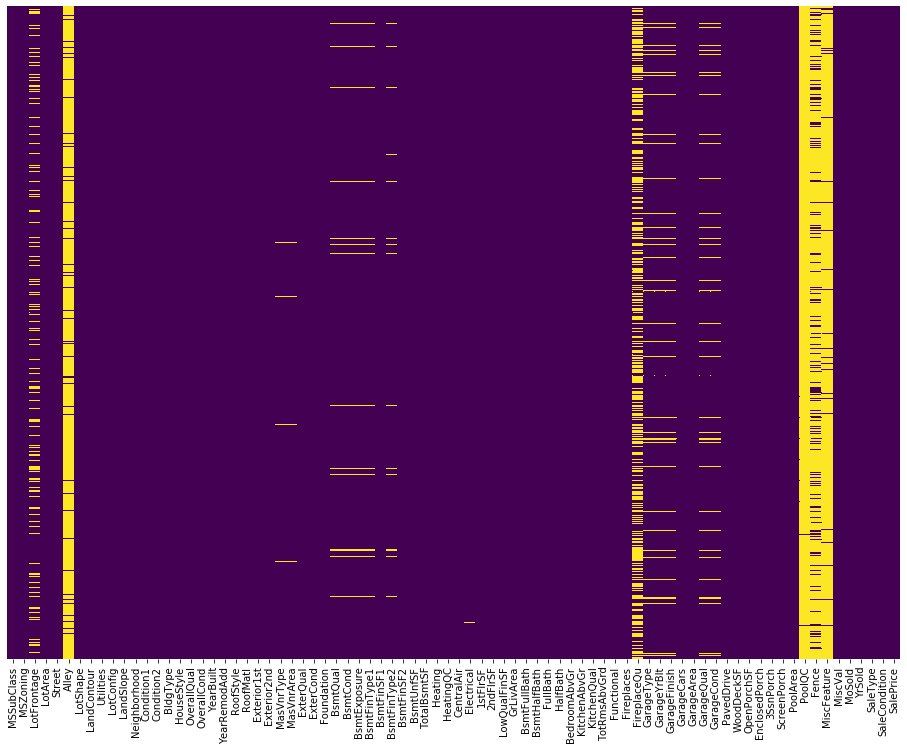

In [6]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

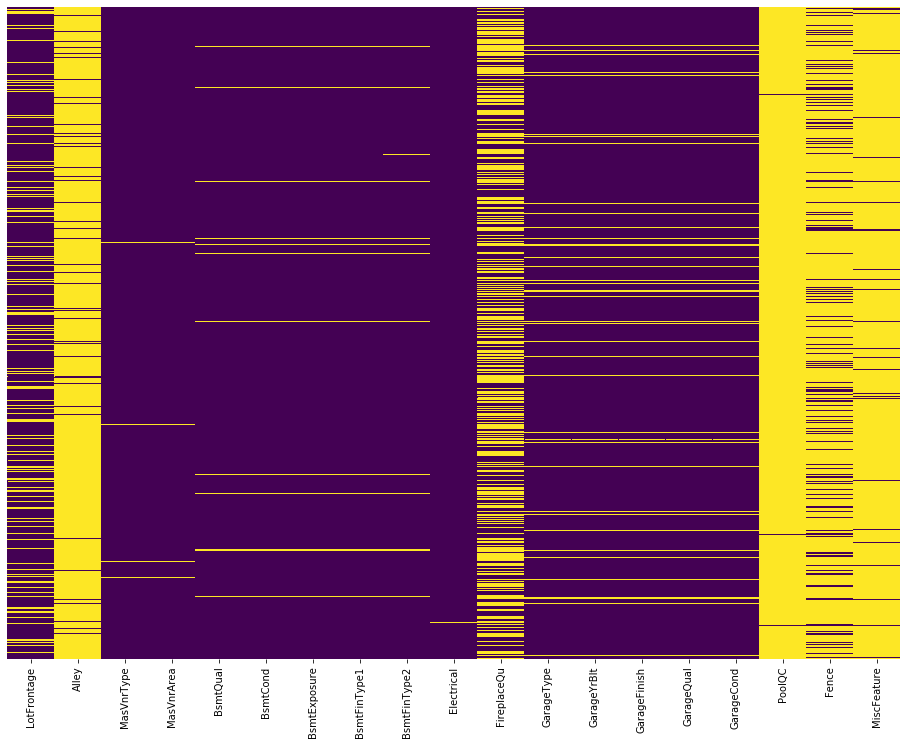

In [7]:
f, ax = plt.subplots(figsize=(16, 12))
col_missing_data = df_train.columns[df_train.isnull().sum() > 0].tolist()
sns.heatmap(df_train[col_missing_data].isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [8]:
for mis_col in col_missing_data:
    print(mis_col, df_train[mis_col].unique())

LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Alley [nan 'Grvl' 'Pave']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
MasVnrArea [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6

## Imputation Based on domain knowledge

In [0]:
## Data that can be filled based on Domain knowledge
Fill_with_none = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageType', 
             'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'FireplaceQu', 'MiscFeature']

In [0]:
for col in Fill_with_none:
    df_train[col] = df_train[col].apply(lambda x : '0' if str(x) == 'nan' else x)

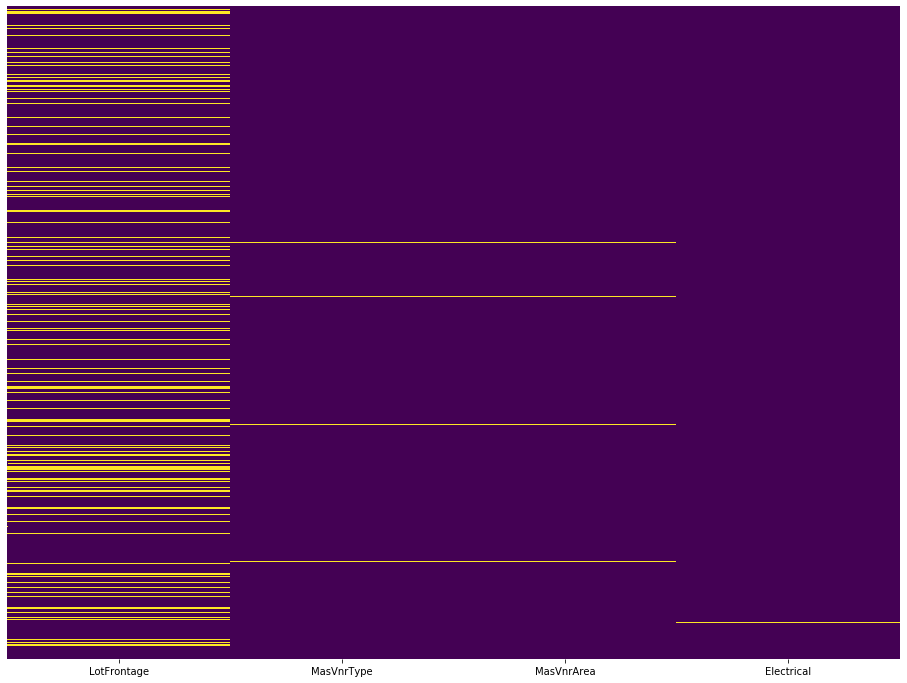

In [11]:
f, ax = plt.subplots(figsize=(16, 12))
col_missing_data = df_train.columns[df_train.isnull().sum() > 0].tolist()
sns.heatmap(df_train[col_missing_data].isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [12]:
print(df_train['MasVnrType'].value_counts()) 
print(df_train['MasVnrArea'].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64


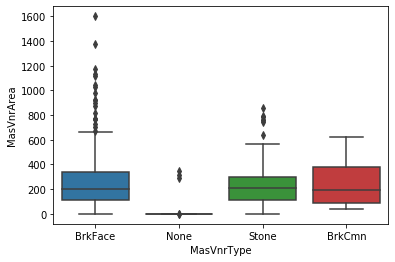

In [13]:
sns.boxplot(x=df_train['MasVnrType'], y=df_train['MasVnrArea'])

In [0]:
df_train['MasVnrType'] = df_train['MasVnrType'].apply(lambda x : 'None' if str(x) == 'nan' else x)
df_train['MasVnrArea'] = df_train['MasVnrArea'].apply(lambda x : '0' if str(x) == 'nan' else x)

In [15]:
print(df_train['Electrical'].value_counts()) 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [0]:
df_train['Electrical'] = df_train['Electrical'].apply(lambda x : 'SBrkr' if str(x) == 'nan' else x)

In [17]:
print(df_train['LotFrontage'].value_counts()) 

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64


In [0]:
df_train['LotFrontage'] = df_train['LotFrontage'].apply(lambda x : df_train['LotFrontage'].mean() if str(x) == 'nan' else x)

## Encoding

In [19]:
categoricals = df_train.select_dtypes(exclude=np.number).columns.tolist()
categoricals

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [0]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].astype('float32')
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].astype('int')

In [0]:
norminal = ['MSZoning', 'Street', 'Alley', 'LotConfig',  'Neighborhood', 'Condition1', 
         'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
         'Exterior2nd', 'MasVnrType', 'Foundation',  'Heating', 'CentralAir', 'Electrical',
         'Functional',  'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition',
         'LotShape', 'LandContour', 'Utilities', 'GarageFinish']

In [0]:
Ordinal = ['LandSlope',  
           'PoolQC', 'KitchenQual','ExterQual', 'ExterCond', 'HeatingQC', 
           'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 
          'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'Fence']

### Ordinal

In [23]:
for o in Ordinal:
    print(df_train[o].unique())

['Gtl' 'Mod' 'Sev']
['0' 'Ex' 'Fa' 'Gd']
['Gd' 'TA' 'Ex' 'Fa']
['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa' 'Po' 'Ex']
['Ex' 'Gd' 'TA' 'Fa' 'Po']
['Gd' 'TA' 'Ex' '0' 'Fa']
['TA' 'Gd' '0' 'Fa' 'Po']
['0' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['TA' 'Fa' 'Gd' '0' 'Ex' 'Po']
['TA' 'Fa' '0' 'Gd' 'Po' 'Ex']
['No' 'Gd' 'Mn' 'Av' '0']
['Unf' 'BLQ' '0' 'ALQ' 'Rec' 'LwQ' 'GLQ']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' '0' 'LwQ']
['0' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [24]:
df_train['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [0]:
slope = lambda x: '0' if x=='Gtl' else '1' if x=='Mod' else '2'
df_train['LandSlope'] = df_train['LandSlope'].apply(slope)

In [26]:
df_train['LandSlope'].value_counts()

0    1382
1      65
2      13
Name: LandSlope, dtype: int64

In [27]:
egtfp = ['KitchenQual','ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC']
for col in egtfp:
    print(df_train[col].value_counts())

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
0     1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64


In [0]:
lvl = lambda x : '0' if x=='Po' or x=='0' else '1' if x=='Fa' else '2' if x=='TA' else '3' if x=='Gd' else '4'

for col in egtfp:
    df_train[col] = df_train[col].apply(lvl)

In [29]:
for col in egtfp:
    print(df_train[col].value_counts())

2    735
3    586
4    100
1     39
Name: KitchenQual, dtype: int64
2    906
3    488
4     52
1     14
Name: ExterQual, dtype: int64
2    1282
3     146
1      28
4       3
0       1
Name: ExterCond, dtype: int64
4    741
2    428
3    241
1     49
0      1
Name: HeatingQC, dtype: int64
0    1453
3       3
1       2
4       2
Name: PoolQC, dtype: int64


In [30]:
egtfpna = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
for col in egtfpna:
    print(df_train[col].value_counts())

TA    649
Gd    618
Ex    121
0      37
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
0       37
Po       2
Name: BsmtCond, dtype: int64
0     690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
TA    1311
0       81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
TA    1326
0       81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [0]:
lvl2 = lambda x : '0' if x=='0' else '1' if x=='Po' else '2' if x=='Fa' else '3' if x=='TA' else '4' if x=='Gd' else '5'

for col in egtfpna:
    df_train[col] = df_train[col].apply(lvl2)

In [32]:
for col in egtfpna:
    print(df_train[col].value_counts())

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64
3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64
0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64
3    1311
0      81
2      48
4      14
1       3
5       3
Name: GarageQual, dtype: int64
3    1326
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64


In [33]:
print(df_train['BsmtExposure'].value_counts())

No    953
Av    221
Gd    134
Mn    114
0      38
Name: BsmtExposure, dtype: int64


In [0]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].apply(lambda x : '0' if x=='0' else '1' if x=='No' else '2' if x=='Mn' else '3' if x=='Av' else '4')

In [35]:
print(df_train['BsmtExposure'].value_counts())

1    953
3    221
4    134
2    114
0     38
Name: BsmtExposure, dtype: int64


In [36]:
print(df_train['BsmtFinType1'].value_counts())
print(df_train['BsmtFinType2'].value_counts())

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
0       37
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
0        38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [0]:
## MAYBE THIS IS NOT ORDINAL
bsmt = lambda x : '0' if x=='0' else '1' if x=='Unf' else '2' if x=='LwQ' else '3' if x=='Rec' else '4' if x=='BLQ' else '5' if x=='ALQ' else '6'

df_train['BsmtFinType1'] = df_train['BsmtFinType1'].apply(bsmt)    
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].apply(bsmt)    

In [38]:
print(df_train['BsmtFinType1'].value_counts())
print(df_train['BsmtFinType2'].value_counts())

1    430
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64
1    1256
3      54
2      46
0      38
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64


In [39]:
print(df_train['Fence'].value_counts())

0        1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64


In [0]:
df_train['Fence'] = df_train['Fence'].apply(lambda x : '0' if x=='0' else '1' if x=='MnWw' else '2' if x=='GdWo' else '3' if x=='MnPrv' else '4')

In [41]:
print(df_train['Fence'].value_counts())

0    1179
3     157
4      59
2      54
1      11
Name: Fence, dtype: int64


In [0]:
for col in Ordinal:
    df_train[col] = df_train[col].astype(float) 

### Norminal

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
df_train[norminal].head()

,MSZoning,Street,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition,LotShape,LandContour,Utilities,GarageFinish
0,RL,Pave,0,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,0,WD,Normal,Reg,Lvl,AllPub,RFn
1,RL,Pave,0,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,0,WD,Normal,Reg,Lvl,AllPub,RFn
2,RL,Pave,0,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,0,WD,Normal,IR1,Lvl,AllPub,RFn
3,RL,Pave,0,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Typ,Detchd,Y,0,WD,Abnorml,IR1,Lvl,AllPub,Unf
4,RL,Pave,0,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,0,WD,Normal,IR1,Lvl,AllPub,RFn


In [45]:
for col in norminal:
    le = LabelEncoder()
    le.fit(df_train[col].unique().astype('str'))
    df_train.loc[:,col] = le.transform(df_train.loc[:,col].astype('str'))

df_train[norminal].head()

,MSZoning,Street,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition,LotShape,LandContour,Utilities,GarageFinish
0,3,1,0,4,5,2,2,0,5,1,1,12,13,1,2,1,1,4,6,2,2,0,8,4,3,3,0,2
1,3,1,0,2,24,1,2,0,2,1,1,8,8,2,1,1,1,4,6,2,2,0,8,4,3,3,0,2
2,3,1,0,4,5,2,2,0,5,1,1,12,13,1,2,1,1,4,6,2,2,0,8,4,0,3,0,2
3,3,1,0,0,6,2,2,0,5,1,1,13,15,2,0,1,1,4,6,6,2,0,8,0,0,3,0,3
4,3,1,0,2,15,2,2,0,5,1,1,12,13,1,2,1,1,4,6,2,2,0,8,4,0,3,0,2


## Correlation visualization

In [46]:
df_train.corr()['SalePrice'].sort_values(ascending = False).tolist()

[1.0,
 0.7909816005838047,
 0.7086244776126511,
 0.6826392416562591,
 0.6595997207286572,
 0.640409197258349,
 0.6234314389183598,
 0.6135805515591944,
 0.6058521846919166,
 0.5852071991725148,
 0.5606637627484452,
 0.5337231555820238,
 0.5228973328794967,
 0.5204376059504007,
 0.5071009671113867,
 0.47261449900457725,
 0.4669288367515242,
 0.4276487073988049,
 0.38641980624215627,
 0.38247899119010337,
 0.3746962210008844,
 0.33490085154055077,
 0.32441344456813076,
 0.31933380283206614,
 0.31585622711605577,
 0.3049078730706334,
 0.2841076755947784,
 0.27383907400622587,
 0.2638433538714063,
 0.26319078447040084,
 0.2613664351029631,
 0.2513281638401573,
 0.23494494099321578,
 0.23135695225722583,
 0.22712223313149718,
 0.22240529240713802,
 0.214479105546969,
 0.21309202967780272,
 0.2126071564855757,
 0.21085146582230405,
 0.18016262334399255,
 0.1682131543007415,
 0.1323831119277861,
 0.1154843047305474,
 0.1153279170832784,
 0.11144657114291048,
 0.10376553702965864,
 0.103551011

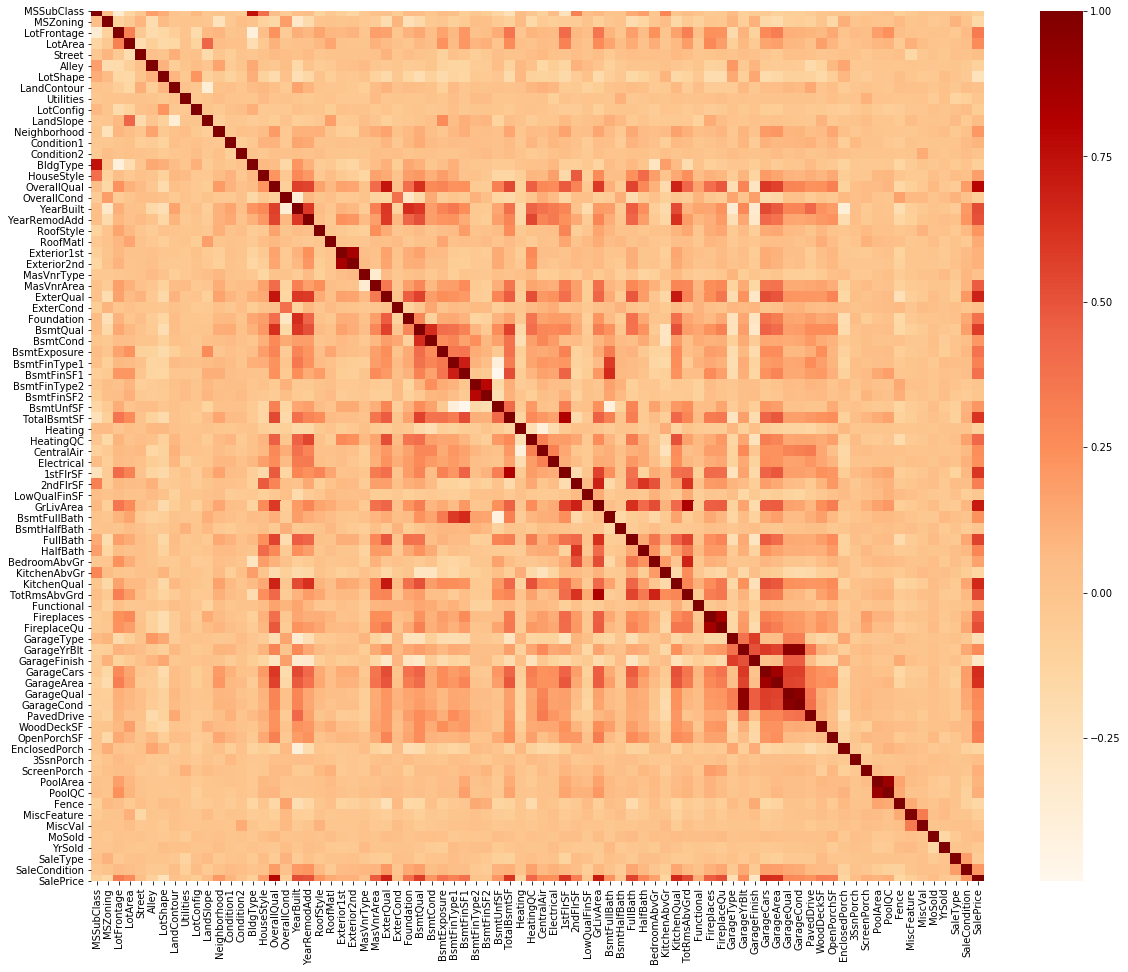

In [47]:
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(df_train.corr(), cmap = 'OrRd');

In [48]:
high_corr = df_train.corr()['SalePrice'][abs(df_train.corr()['SalePrice']) > 0.5].sort_values(ascending = False)
high_corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.585207
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

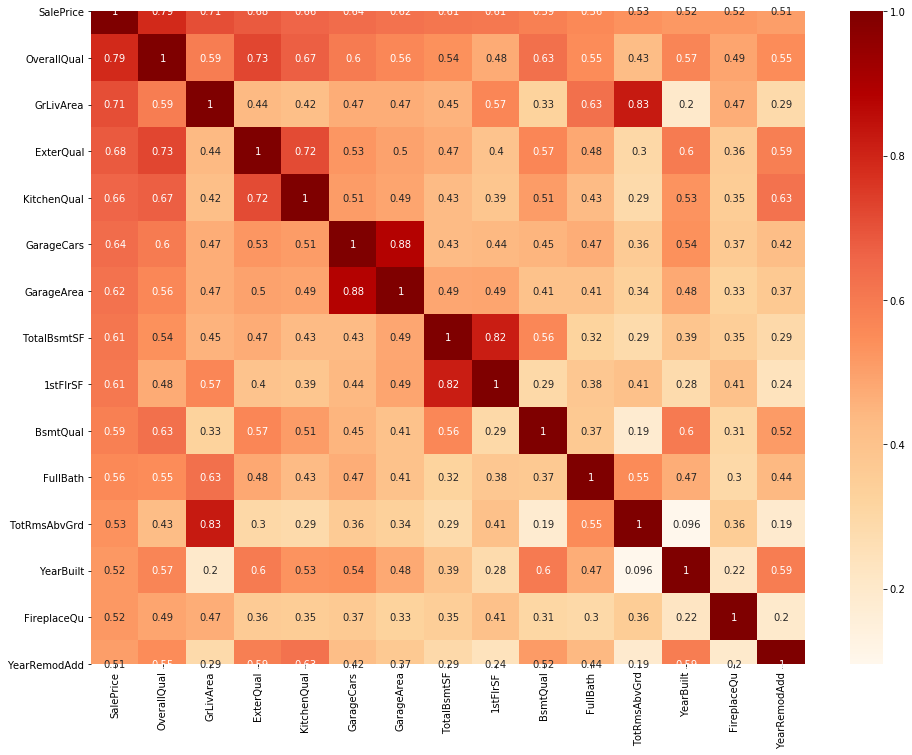

In [49]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train[high_corr.index].corr(), cbar=True, annot=True, cmap = 'OrRd');

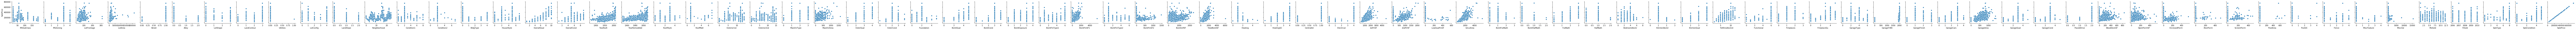

In [50]:
pp = sns.pairplot(data=df_train,
                  y_vars=['SalePrice'],
                  x_vars=df_train.columns.tolist())

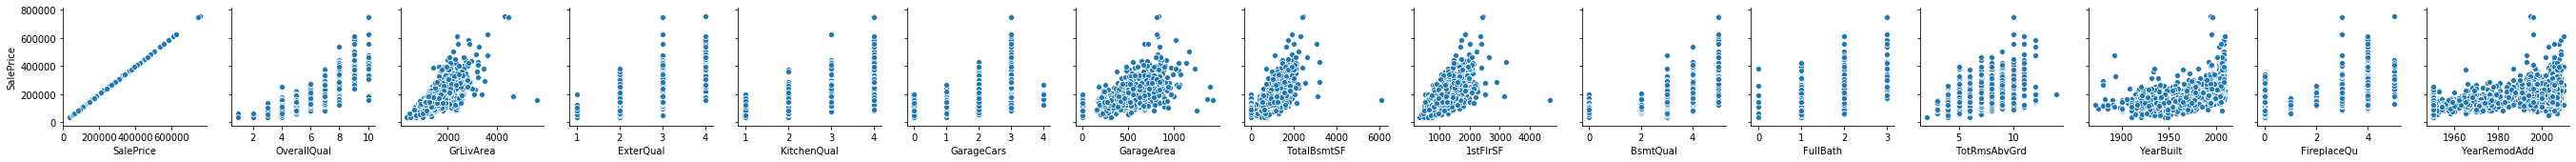

In [51]:
pp = sns.pairplot(data=df_train,
                  y_vars=['SalePrice'],
                  x_vars=high_corr.index.tolist())

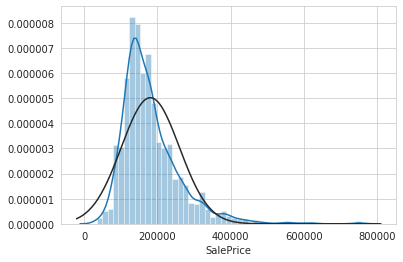

In [52]:
sns.set_style('whitegrid')
sns.distplot(df_train["SalePrice"],fit=norm)

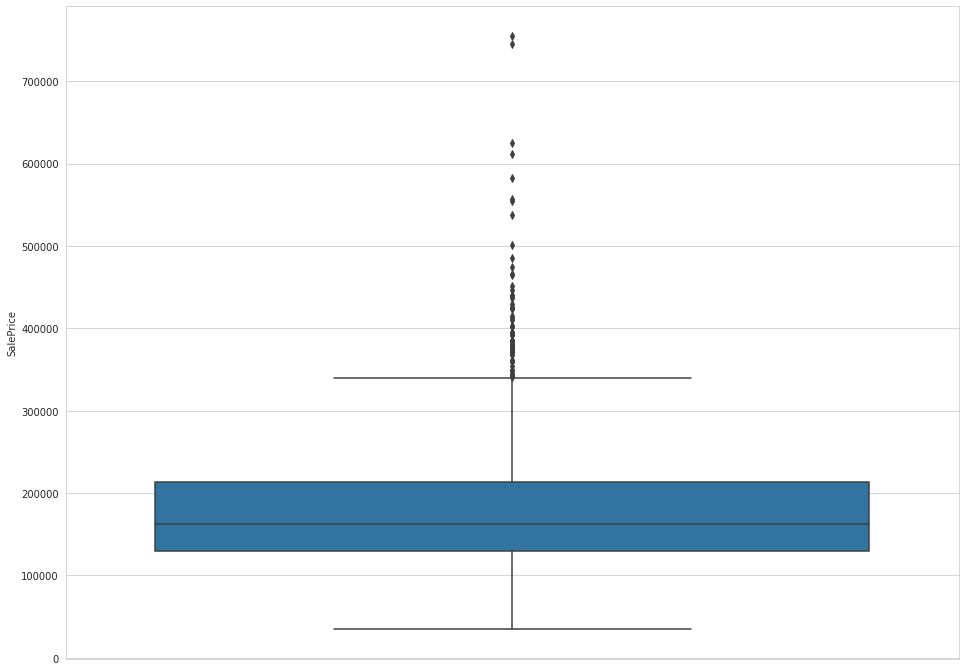

In [53]:
f, ax = plt.subplots(figsize=(16, 12))
sns.boxplot(y=df_train["SalePrice"])

In [54]:
for categorical in categoricals:
    df_train.loc[:,categorical] = label_encoder.fit_transform(df_train.loc[:,categorical].astype('str')).astype('float64')
df_train[categoricals].head()

NameError: ignored

In [0]:
numericals = df_train.select_dtypes(include=np.number).columns.tolist()
numericals

In [0]:
missing_numerical_cols = intersection(col_missing_data, numericals)
missing_numerical_cols

In [0]:
df_train[df_train['GarageYrBlt'].isnull()]['GarageArea'].sum()

In [0]:
df_train[df_train['GarageYrBlt'].isnull()]['GarageCars'].sum()

In [0]:
#someone figure out what this data refers to and think of the strategy to fill in
for missing_numerical in missing_numerical_cols:
    print(df_train[missing_numerical].unique())

In [0]:
#FILL NUMERIC

# Visualizations

In [0]:
#Start with Weak Positive Correlation


In [0]:
#Closer Look with values that correlate with saleprice.

In [0]:
# Strong Correlation values between predictor variable!
# GarageCars & GarageArea. Increase In Area of Garage -> Increase in number Cars
# TotRmsAbvGrd & GrLivArea. Total rooms above grade (does not include bathrooms) & Above grade (ground) living area square feet
# 1stFlrSF & TotalBsmtSF. First Floor square feet & Total square feet of basement area

In [0]:
# REMOVE FEATURE
# 1) Garage Area - People dont think about how many Msq when viewing the garage. They estimate how many cars can fit into the garage

In [0]:
sns.scatterplot(x = df_train['SalePrice'], y = df_train['GarageFinish'])

In [0]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train[corr.index].isnull(), cmap = 'Greys');

In [0]:
df_train['SalePrice'].describe()

In [0]:
sns.set(style="whitegrid",)
plt.figure(figsize=(16, 6))
ax = sns.boxplot(y=df_train["SalePrice"])

In [0]:
sns.distplot(df_train["SalePrice"],fit=norm)

In [0]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())
# Positive skew https://becominghuman.ai/how-to-deal-with-skewed-dataset-in-machine-learning-afd2928011cc


In [0]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [0]:
sns.distplot(df_train["SalePrice"],fit=norm)

In [0]:
sns.pairplot(data = df_train[cor.index])

# Data Pre-Processing

In [0]:
# shuffle here
# k-fold cross validation

X_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values
X_valid =
y_valid =

In [0]:
X_train

# Prediction

## XGBoost

In [0]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

In [0]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

In [0]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

In [0]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

In [0]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

In [0]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

## RandomForestRegressor

## 3-layer Feedforward Neural Network

# Ridge/lasso regression

In [55]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,0,3,3,0,4,0.0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,3.0,2.0,2,4.0,3.0,1.0,6.0,706,1.0,0,150,856,1,4.0,1,4,856,854,0,1710,1,0,2,1,3,1,3.0,8,6,0,0.0,2,2003,2,2,548,3.0,3.0,2,0,61,0,0,0,0,0.0,0.0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,0,3,3,0,2,0.0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,2.0,2.0,1,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,1,4.0,1,4,1262,0,0,1262,0,1,2,0,3,1,2.0,6,6,1,3.0,2,1976,2,2,460,3.0,3.0,2,298,0,0,0,0,0,0.0,0.0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,0,3,0,4,0.0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,3.0,2.0,2,4.0,3.0,2.0,6.0,486,1.0,0,434,920,1,4.0,1,4,920,866,0,1786,1,0,2,1,3,1,3.0,6,6,1,3.0,2,2001,2,2,608,3.0,3.0,2,0,42,0,0,0,0,0.0,0.0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,0,3,0,0,0.0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,2.0,2.0,0,3.0,4.0,1.0,5.0,216,1.0,0,540,756,1,3.0,1,4,961,756,0,1717,1,0,1,0,3,1,3.0,7,6,1,4.0,6,1998,3,3,642,3.0,3.0,2,0,35,272,0,0,0,0.0,0.0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,0,3,0,2,0.0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,3.0,2.0,2,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,1,4.0,1,4,1145,1053,0,2198,1,0,2,1,4,1,3.0,9,6,1,3.0,2,2000,2,3,836,3.0,3.0,2,192,84,0,0,0,0,0.0,0.0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,0,3,3,0,4,0.0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,2,0.0,2.0,2.0,2,4.0,3.0,1.0,1.0,0,1.0,0,953,953,1,4.0,1,4,953,694,0,1647,0,0,2,1,3,1,2.0,7,6,1,3.0,2,1999,2,2,460,3.0,3.0,2,0,40,0,0,0,0,0.0,0.0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,0,3,3,0,4,0.0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,3,119.0,2.0,2.0,1,4.0,3.0,1.0,5.0,790,3.0,163,589,1542,1,2.0,1,4,2073,0,0,2073,1,0,2,0,3,1,2.0,7,2,2,3.0,2,1978,3,2,500,3.0,3.0,2,349,0,0,0,0,0,0.0,3.0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,0,3,3,0,4,0.0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,2,0.0,4.0,3.0,4,3.0,4.0,1.0,6.0,275,1.0,0,877,1152,1,4.0,1,4,1188,1152,0,2340,0,0,2,0,4,1,3.0,9,6,2,4.0,2,1941,2,1,252,3.0,3.0,2,0,60,0,0,0,0,0.0,4.0,3,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,0,3,3,0,4,0.0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,2,0.0,2.0,2.0,1,3.0,3.0,2.0,6.0,49,3.0,1029,0,1078,1,3.0,1,0,1078,0,0,1078,1,0,1,0,2,1,3.0,5,6,0,0.0,2,1950,3,1,240,3.0,3.0,2,366,0,112,0,0,0,0.0,0.0,0,0,4,2010,8,4,142125


In [56]:
#What is Regularization?
Overfitting is one of the most annoying things about a Machine Learning model. 
After all those time-consuming processes that took to gather the data, clean 
and preprocess it, the model is still incapable to give out an optimised result.
  There can be lots of noises in data which may be the variance in the target 
  variable for the same and exact predictors or irrelevant features or it can 
  be corrupted data points. The ML model is unable to identify the noises and 
  hence uses them as well to train the model. This can have a negative impact
  on the predictions of the model. This is called overfitting.



SyntaxError: ignored

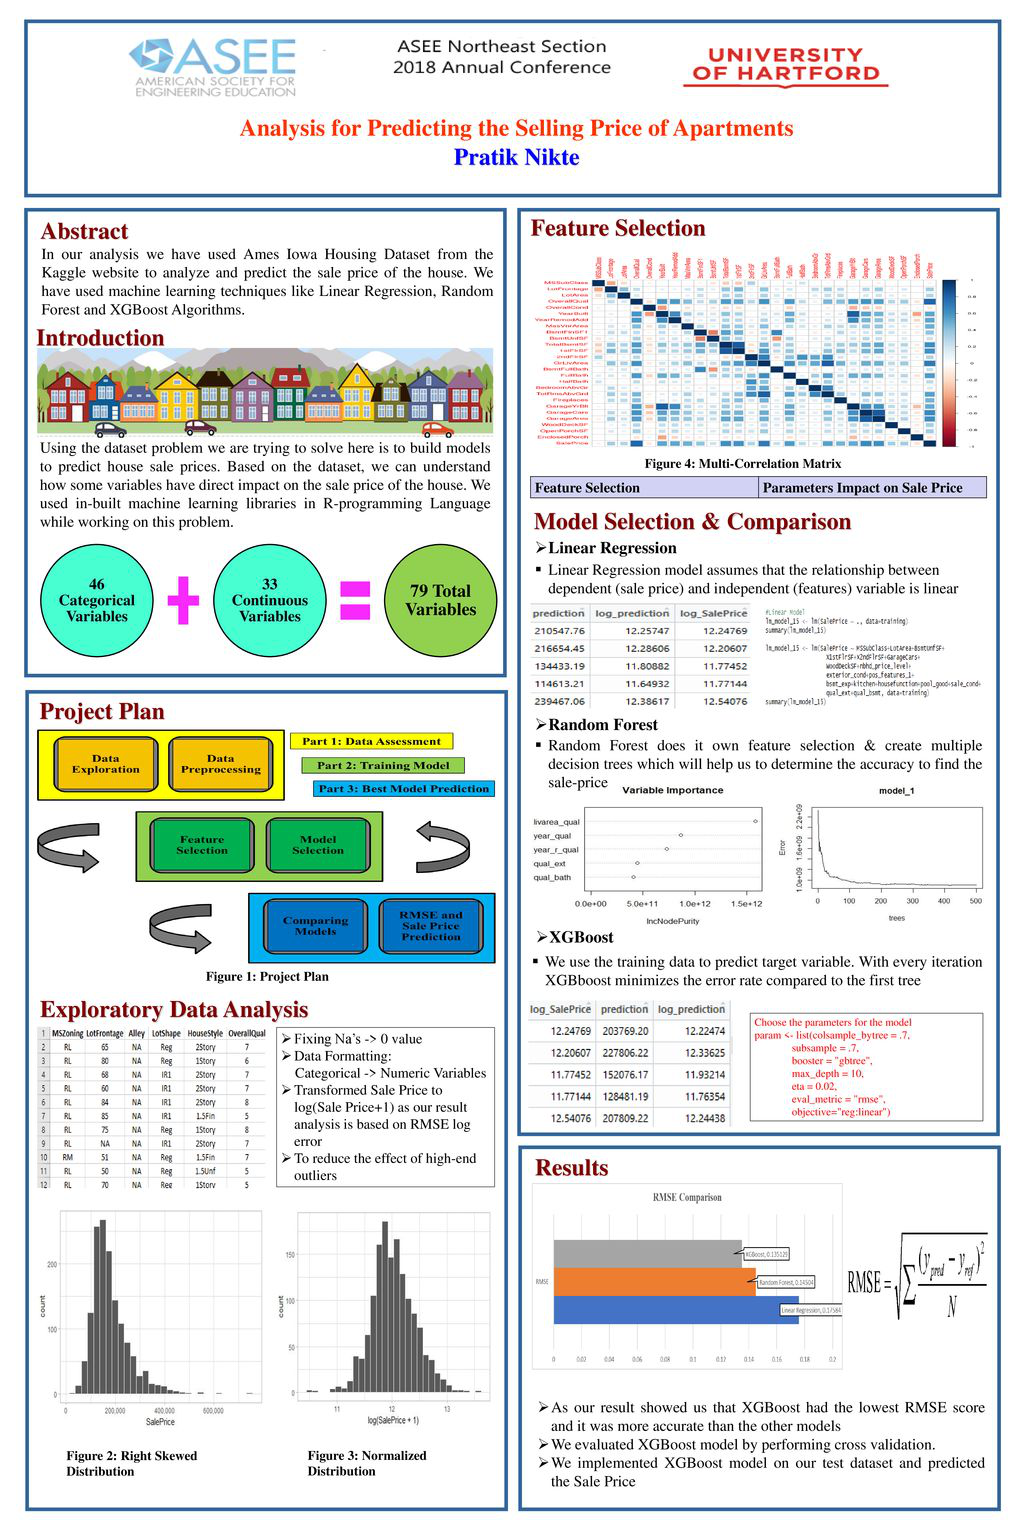

In [57]:
from PIL import Image
import requests


im = Image.open(requests.get('https://nycdsa-blog-files.s3.us-east-2.amazonaws.com/2019/09/ML_project_variables-1-1024x576.png', stream=True).raw)
im1 = Image.open(requests.get('https://player.slideplayer.com/95/16366117/slides/slide_1.jpg', stream=True).raw)
im
im1

#Feature engineering

The train data size before dropping Id feature is: (1456, 80)
The test data size before dropping Id feature is: (1459, 79)


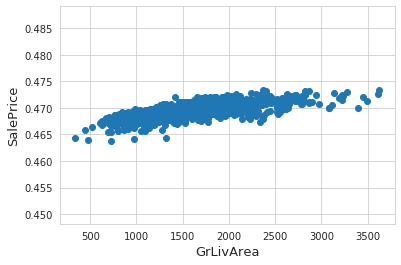

In [136]:
#Feature engineering
#df_train
#df_test

# check the numbers of samples and features
print('The train data size before dropping Id feature is: {}'.format(df_train.shape))
print('The test data size before dropping Id feature is: {}'.format(df_test.shape))

train = df_train
test = df_test

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y= train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.show()




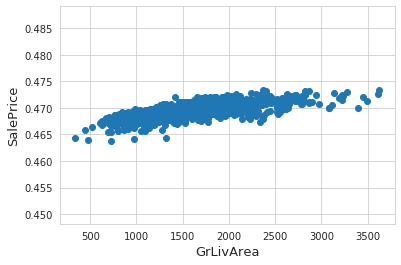

In [137]:
# Deleting outliers
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice'] <300000)].index, inplace=True)
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y= train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.show()

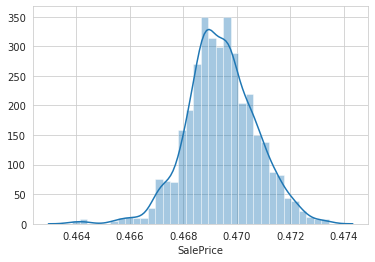

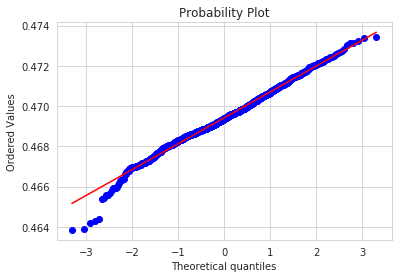

In [138]:
sns.distplot(train['SalePrice'])

# Get the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

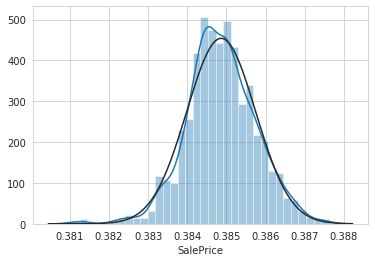

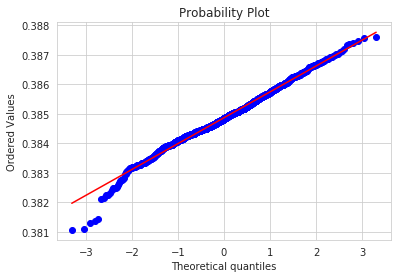

In [139]:
#The target is right skewed. As linear models love normally distributed data, we need to transform this variable and make it more normally distributed.

# We use the numpy function log1p which is log(1+x) to all elements of the column 
train['SalePrice'] = np.log1p(train['SalePrice'])

# Check the new distribution
sns.distplot(train['SalePrice'], fit=norm)

# Get the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [140]:
#check for missing ratio
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop('SalePrice',axis=1, inplace = True)
print ('all_data size is :{}'.format(all_data.shape))

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

all_data size is :(2915, 79)


,Missing Ratio
PoolQC,49.948542
MiscFeature,48.301887
Alley,46.380789
Fence,40.102916
FireplaceQu,25.042882
LotFrontage,7.787307
GarageQual,2.675815
GarageCond,2.675815
GarageFinish,2.675815
GarageYrBlt,2.675815


Text(0.5, 1.0, 'Percent missing data by feature')

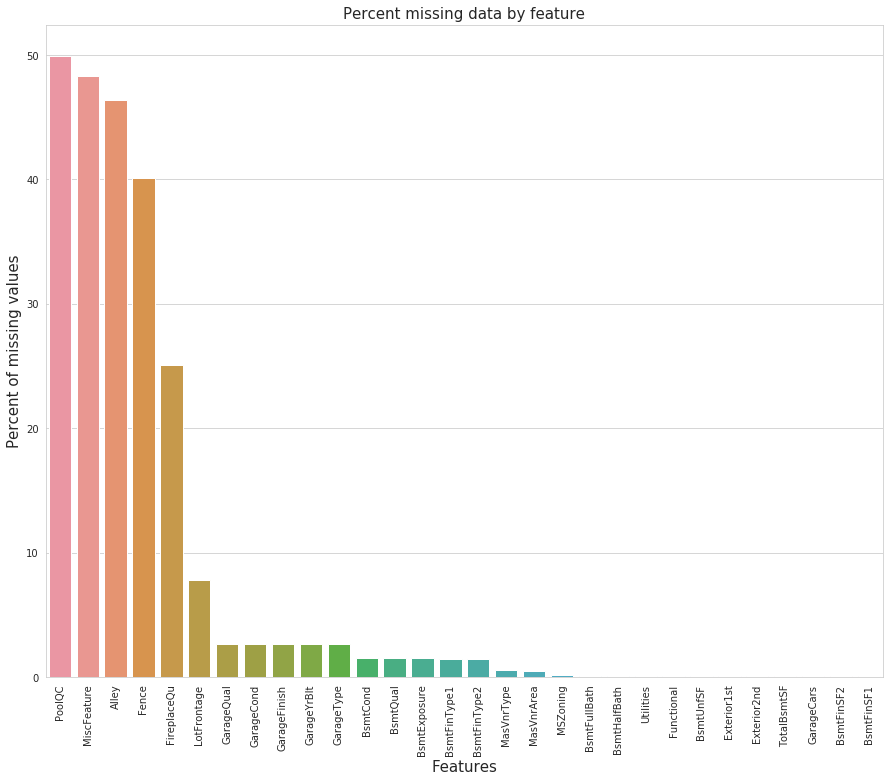

In [141]:
#plot as grapgh for missing data by feature
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
#Text(0.5,1,'Percent missing data by feature')

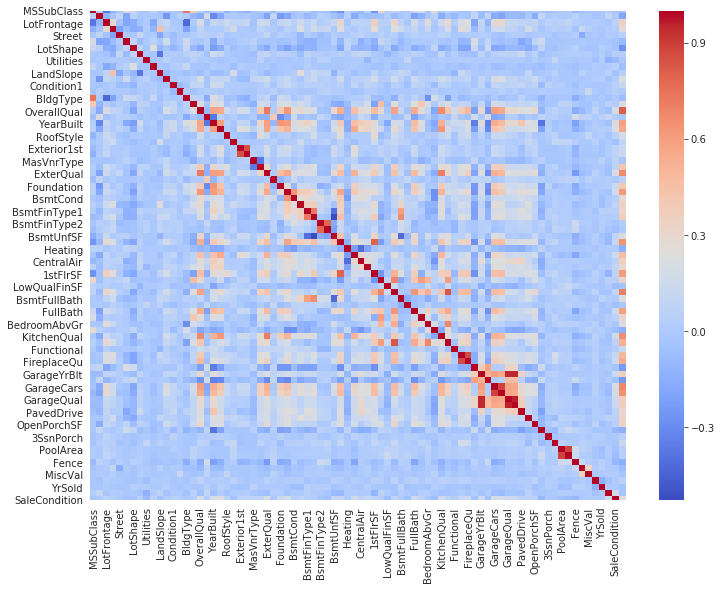

In [142]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, cmap='coolwarm')

In [143]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,0,3,0,3,1,706.0,0.0,6,1,1.0,0.0,4,150.0,1,2,2,4,0,2,3,12,13,0,0,0,2,2,6,548.0,2.0,3,2,3,2,2003.0,1710,1,1,4,5,1,3,3,0,8450,4,65.0,3,0,60,3,196.0,1,0,0,2,5,61,5,7,2,0,0,1,1,4,8,0,1,8,856.0,0,0,2003,2003,2008
1,1262,0,0,0,3,0,3,4,978.0,0.0,5,1,0.0,1.0,4,284.0,1,1,2,4,0,2,2,8,8,0,3,1,1,2,6,460.0,2.0,3,2,3,2,1976.0,1262,0,1,4,2,1,2,3,0,9600,2,80.0,3,0,20,3,0.0,2,0,0,5,24,0,8,6,2,0,0,1,1,4,8,0,1,6,1262.0,0,298,1976,1976,2007
2,920,866,0,0,3,0,3,2,486.0,0.0,6,1,1.0,0.0,4,434.0,1,2,2,4,0,2,3,12,13,0,3,1,2,2,6,608.0,2.0,3,2,3,2,2001.0,1786,1,1,4,5,1,3,3,0,11250,4,68.0,0,0,60,3,162.0,1,0,0,9,5,42,5,7,2,0,0,1,1,4,8,0,1,6,920.0,0,0,2001,2002,2008
3,961,756,0,0,3,0,4,1,216.0,0.0,5,1,1.0,0.0,3,540.0,1,2,2,4,272,2,2,13,15,0,4,1,0,1,6,642.0,3.0,3,3,3,6,1998.0,1717,0,1,3,5,1,3,3,0,9550,0,60.0,0,0,70,3,0.0,2,0,0,2,6,35,5,7,2,0,0,1,1,0,8,0,1,7,756.0,0,0,1915,1970,2006
4,1145,1053,0,0,4,0,3,3,655.0,0.0,6,1,1.0,0.0,4,490.0,1,2,2,4,0,2,3,12,13,0,3,1,2,2,6,836.0,3.0,3,2,3,2,2000.0,2198,1,1,4,5,1,3,3,0,14260,2,84.0,0,0,60,3,350.0,1,0,0,12,15,84,5,8,2,0,0,1,1,4,8,0,1,9,1145.0,0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,546.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,NaN,NaN,0,CBlock,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1092,1,GasA,Gd,2Story,1,TA,Lvl,Gtl,1936,Inside,21.0,Reg,0,160,RM,0.0,None,NaN,0,6,MeadowV,0,7,4,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
2911,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,Rec,Unf,0.0,0.0,TA,294.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,NaN,NaN,0,CBlock,1,Typ,286.0,1.0,TA,Unf,TA,CarPort,1970.0,1092,1,GasA,TA,2Story,1,TA,Lvl,Gtl,1894,Inside,21.0,Reg,0,160,RM,0.0,None,NaN,0,4,MeadowV,24,5,4,Y,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
2912,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,ALQ,Unf,1.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,TA,1,CBlock,1,Typ,576.0,2.0,TA,Unf,TA,Detchd,1960.0,1224,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,20000,Inside,160.0,Reg,0,20,RL,0.0,None,NaN,0,9,Mitchel,0,7,5,Y,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
2913,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,GLQ,Unf,0.0,1.0,Gd,575.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Wd Shng,MnPrv,NaN,0,PConc,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,970,0,GasA,TA,SFoyer,1,TA,Lvl,Gtl,10441,Inside,62.0,Reg,0,85,RL,0.0,None,Shed,700,7,Mitchel,32,5,5,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [144]:
# PoolQC: data description says NA means "No Pool". That makes sense, given the huge ratio of missing value (+99%)
# and majority of houses have no Pool at all in general.
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')
# MiscFeature: data description says NA means 'no misc feature'
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')
# Alley: data description says NA means 'no alley access'
all_data['Alley'] = all_data['Alley'].fillna('None')
# Fence: data description says NA means 'no fence'
all_data['Fence'] = all_data['Fence'].fillna('None')
# FireplaceQu: data description says NA means 'no fireplace'
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')
all_data['LotFrontage']  = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head() #no missing ratio

,Missing Ratio


In [145]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, make_scorer
#Transform some numerical variabless that are really categorical
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

#categories features
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))


all_data = pd.get_dummies(all_data)
print(all_data.shape)


train = all_data[:ntrain]
test = all_data[ntrain:]

#from sklearn
X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size = 0.3, random_state = 0)
# Define error measure for official scoring: RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv =10))
    return(rmse)

def rmse_cv_test(model):
    rmse = np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

Shape all_data: (2915, 78)
(2915, 366)


RMSE on Training set : 34.779433290849134
RMSE on Test set : 23.24201374521267


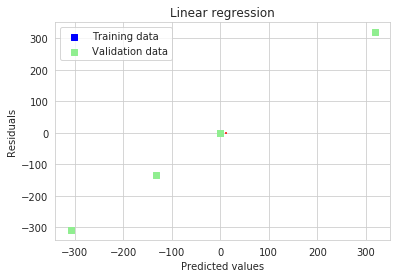

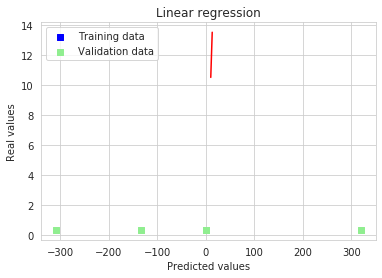

In [146]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
#1* Linear Regression without regularization
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

best alpha : 10.0
best alpha : 14.0
Ridge RMSE on Training set: 0.0002673792442084928
Ridge RMSE on Test set: 0.00026985359008135424


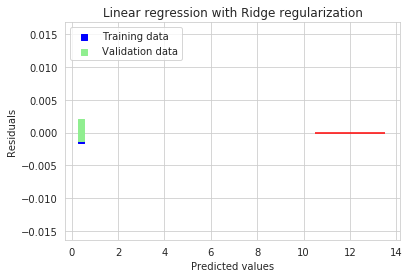

In [147]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print('best alpha : {}'.format(alpha))

# Try again for more precision with alphas centered around

ridge = RidgeCV(alphas = [alpha *.6, alpha *.65, alpha *.7, alpha *.8, alpha*.9, alpha*.95, alpha, alpha *1.1,
                         alpha *1.25, alpha*1.3, alpha*1.35, alpha*1.4])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print('best alpha : {}'.format(alpha))


print("Ridge RMSE on Training set: {}".format(rmse_cv_train(ridge).mean()))
print("Ridge RMSE on Test set: {}".format(rmse_cv_test(ridge).mean()))
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)


# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()